# Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!mkdir ~/.pa-100k

In [ ]:
from zipfile import ZipFile

file = '/content/drive/MyDrive/PA-100K/annotation.zip'

with ZipFile(file, 'r') as zip:
  zip.printdir()

  print('extracting annotations...')
  zip.extractall(path='/content/pa-100k/') #colocar pasta zipada no drive
  print('Done!')

File Name                                             Modified             Size
annotation.mat                                 2017-07-26 13:11:32       579061
README.txt                                     2017-07-26 13:35:52          638
extracting annotations...
Done!


In [ ]:
import scipy.io
import pandas as pd
import numpy as np

mat_data = scipy.io.loadmat('/content/pa-100k/annotation.mat')

# Extract data from the loaded MATLAB file
train_images_name = mat_data['train_images_name']
val_images_name = mat_data['val_images_name']
test_images_name = mat_data['test_images_name']

train_label = mat_data['train_label']
val_label = mat_data['val_label']
test_label = mat_data['test_label']

attributes = mat_data['attributes']

# Convert ndarray attribute names to strings
attribute_names = [name.item() for name in attributes.flatten()]

# Convert the data to a DataFrame with string column labels
train_df = pd.DataFrame(data=train_label, columns=attribute_names)
val_df = pd.DataFrame(data=val_label, columns=attribute_names)
test_df = pd.DataFrame(data=test_label, columns=attribute_names)

# Save DataFrames to CSV files
train_df.to_csv('/content/pa-100k/train_data.csv', index=False)
val_df.to_csv('/content/pa-100k/val_data.csv', index=False)
test_df.to_csv('/content/pa-100k/test_data.csv', index=False)

In [ ]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Female              10000 non-null  uint8
 1   AgeOver60           10000 non-null  uint8
 2   Age18-60            10000 non-null  uint8
 3   AgeLess18           10000 non-null  uint8
 4   Front               10000 non-null  uint8
 5   Side                10000 non-null  uint8
 6   Back                10000 non-null  uint8
 7   Hat                 10000 non-null  uint8
 8   Glasses             10000 non-null  uint8
 9   HandBag             10000 non-null  uint8
 10  ShoulderBag         10000 non-null  uint8
 11  Backpack            10000 non-null  uint8
 12  HoldObjectsInFront  10000 non-null  uint8
 13  ShortSleeve         10000 non-null  uint8
 14  LongSleeve          10000 non-null  uint8
 15  UpperStride         10000 non-null  uint8
 16  UpperLogo           10000 non-null  uint8

In [ ]:
data_file = '/content/drive/MyDrive/PA-100K/data.zip'

with ZipFile(data_file, 'r') as zip:
  zip.printdir()

  print('extracting data...')
  zip.extractall(path='/content/pa-100k/')
  print('Done!')

Streaming output truncated to the last 5000 lines.
release_data/release_data/095003.jpg           2017-07-26 10:09:16         5480
release_data/release_data/095004.jpg           2017-07-26 10:10:40         3735
release_data/release_data/095005.jpg           2017-07-26 10:17:16         3292
release_data/release_data/095006.jpg           2017-07-26 10:15:04         2246
release_data/release_data/095007.jpg           2017-07-26 10:06:28         6155
release_data/release_data/095008.jpg           2017-07-26 10:34:56         3453
release_data/release_data/095009.jpg           2017-07-26 10:29:08         4931
release_data/release_data/095010.jpg           2017-07-26 10:19:44         4246
release_data/release_data/095011.jpg           2017-07-26 10:34:24         3286
release_data/release_data/095012.jpg           2017-07-26 10:20:58         5741
release_data/release_data/095013.jpg           2017-07-26 10:34:52         3637
release_data/release_data/095014.jpg           2017-07-26 10:14:16   

In [ ]:
image_names = [f'{i + 1:06d}.jpg' for i in range(len(test_df)+len(train_df)+len(val_df))]
image_names[0:10]

['000001.jpg',
 '000002.jpg',
 '000003.jpg',
 '000004.jpg',
 '000005.jpg',
 '000006.jpg',
 '000007.jpg',
 '000008.jpg',
 '000009.jpg',
 '000010.jpg']

In [ ]:
image_names_train = [f'{i + 1:06d}.jpg' for i in range(len(train_df))]
image_names_val = [f'{i + 1 + len(train_images_name):06d}.jpg' for i in range(len(val_df))]
image_names_test = [f'{i + 1 + len(train_images_name) + len(val_images_name):06d}.jpg' for i in range(len(test_df))]

In [ ]:
train_df['filename']= image_names_train
val_df['filename'] = image_names_val
test_df['filename'] = image_names_test

In [ ]:
train_df.set_index('filename',inplace=True)
val_df.set_index('filename',inplace=True)
test_df.set_index('filename',inplace=True)

In [ ]:
val_df.head()

,Female,AgeOver60,Age18-60,AgeLess18,Front,Side,Back,Hat,Glasses,HandBag,...,UpperLogo,UpperPlaid,UpperSplice,LowerStripe,LowerPattern,LongCoat,Trousers,Shorts,Skirt&Dress,boots
filename,,,,,,,,,,,,,,,,,,,,,
080001.jpg,1,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
080002.jpg,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
080003.jpg,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
080004.jpg,1,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
080005.jpg,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
val_df.to_csv("validation_dataframe.csv")

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

In [ ]:
features = ['Female','Front','Back', 'Side','Trousers','Shorts', 'Skirt&Dress']
data_path = '/content/pa-100k/release_data/release_data/'

In [ ]:
val_df.index[0]

'080001.jpg'

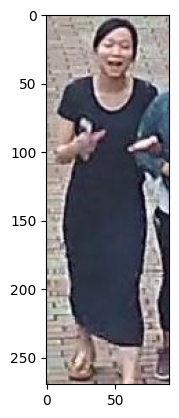

,080001.jpg
Female,1
Front,1
Back,0
Side,0
Trousers,0
Shorts,0
Skirt&Dress,1


In [ ]:
picture = data_path + val_df.index[0]#'000001.jpg'
img = mpimg.imread( picture )
imgplot = plt.imshow( img )
plt.show()
val_df.loc[picture.split('/')[-1]][features]

# XAI

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow==2.15

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 35.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 5.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.2
    Uninstalling wrapt-1.17.2:
      Successfully uninstalled wrapt-1.17.2
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully unin

In [ ]:
import os
import cv2
import shap
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_input

In [ ]:
violence_model_path = '/content/drive/MyDrive/ModelWeights/Violence/inception_model.keras'

model_inception = tf.keras.saving.load_model(violence_model_path)

2/2 [==============================] - 1s 525ms/step


  0%|          | 0/4998 [00:00<?, ?it/s]

1/1 [==============================] - 0s 367ms/step


PartitionExplainer explainer: 2it [05:14, 314.14s/it]              


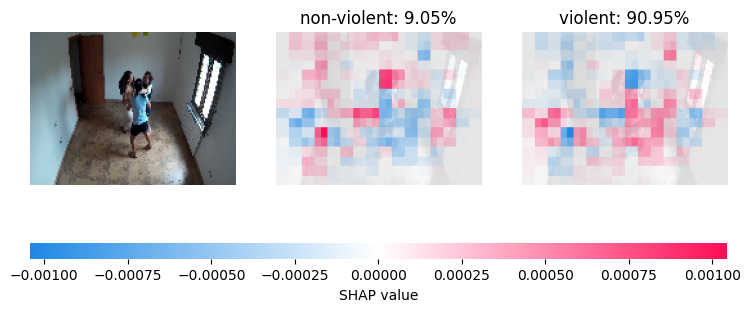

In [ ]:
def f(imgs):
    # imgs comes as (n, 120, 160, 3)
    imgs = tf.cast(imgs, tf.float32)
    imgs = preprocess_input(imgs)  # same size, just normalized
    return model_inception.predict(imgs)

# Load and prepare one test image
imagem = cv2.imread('/content/drive/MyDrive/AIRTLab/test/non-violent/v35f169.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)   # ensure RGB
imagem = cv2.resize(imagem, (160, 120))            # (width, height) in cv2
imagem = np.array(imagem)

# Masker with the correct shape
masker_blur = shap.maskers.Image("inpaint_telea", (120,160,3))

# Explainer
explainer = shap.Explainer(f, masker_blur, output_names=["non-violent", "violent"])

# Predictions
pred = f(np.expand_dims(imagem, axis=0))
labels_predictions = [
    f"non-violent: {pred[0][0]*100:.2f}%",
    f"violent: {pred[0][1]*100:.2f}%"
]

# SHAP values
shap_values_ = explainer(np.expand_dims(imagem, axis=0), max_evals=5000, batch_size=50)

# Plot
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

In [ ]:
def pred(img_file):
  print(img_file)
  imagem = cv2.imread('/content/drive/MyDrive/AIRTLab/test/non-violent/' + img_file)
  imagem = cv2.resize(imagem, (160, 120))
  imagem = tf.cast(imagem, tf.float32)
  imagem = tf.expand_dims(imagem, 0)
  imagem = preprocess_input(imagem)
  result = model_inception.predict(imagem)
  label = 'violent' if result[0][1] > result[0][0] else 'non-violent'
  return (label, img_file)

In [ ]:
files = os.listdir('/content/drive/MyDrive/AIRTLab/test/non-violent/')

In [ ]:
resultados = [pred(file_name) for file_name in files]

v37f2.jpg
1/1 [==============================] - 0s 78ms/step
v37f4.jpg
1/1 [==============================] - 0s 73ms/step
v37f1.jpg
1/1 [==============================] - 0s 71ms/step
v37f8.jpg
1/1 [==============================] - 0s 73ms/step
v37f26.jpg
1/1 [==============================] - 0s 74ms/step
v37f12.jpg
1/1 [==============================] - 0s 73ms/step
v37f42.jpg
1/1 [==============================] - 0s 71ms/step
v37f41.jpg
1/1 [==============================] - 0s 70ms/step
v37f35.jpg
1/1 [==============================] - 0s 71ms/step
v37f23.jpg
1/1 [==============================] - 0s 114ms/step
v37f55.jpg
1/1 [==============================] - 0s 119ms/step
v37f57.jpg
1/1 [==============================] - 0s 112ms/step
v37f47.jpg
1/1 [==============================] - 0s 123ms/step
v37f60.jpg
1/1 [==============================] - 0s 93ms/step
v37f94.jpg
1/1 [==============================] - 0s 75ms/step
v37f82.jpg
1/1 [==============================] - 0s 72

In [ ]:
resultados

[('non-violent', 'v37f2.jpg'),
 ('violent', 'v37f4.jpg'),
 ('violent', 'v37f1.jpg'),
 ('non-violent', 'v37f8.jpg'),
 ('non-violent', 'v37f26.jpg'),
 ('non-violent', 'v37f12.jpg'),
 ('non-violent', 'v37f42.jpg'),
 ('non-violent', 'v37f41.jpg'),
 ('non-violent', 'v37f35.jpg'),
 ('non-violent', 'v37f23.jpg'),
 ('non-violent', 'v37f55.jpg'),
 ('non-violent', 'v37f57.jpg'),
 ('non-violent', 'v37f47.jpg'),
 ('non-violent', 'v37f60.jpg'),
 ('non-violent', 'v37f94.jpg'),
 ('non-violent', 'v37f82.jpg'),
 ('non-violent', 'v37f99.jpg'),
 ('non-violent', 'v37f61.jpg'),
 ('non-violent', 'v37f64.jpg'),
 ('non-violent', 'v37f103.jpg'),
 ('non-violent', 'v37f137.jpg'),
 ('non-violent', 'v37f129.jpg'),
 ('non-violent', 'v37f146.jpg'),
 ('non-violent', 'v37f143.jpg'),
 ('non-violent', 'v37f140.jpg'),
 ('non-violent', 'v54f43.jpg'),
 ('non-violent', 'v54f62.jpg'),
 ('non-violent', 'v54f25.jpg'),
 ('non-violent', 'v54f59.jpg'),
 ('non-violent', 'v54f97.jpg'),
 ('non-violent', 'v54f96.jpg'),
 ('non-violent

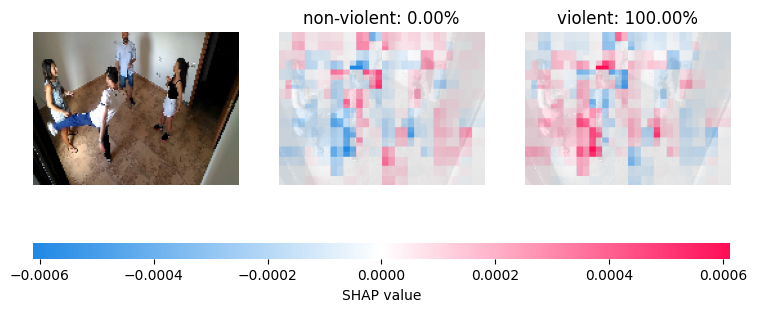

In [ ]:
#'/content/drive/MyDrive/AIRTLab/test/violent/v3f119.jpg'
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

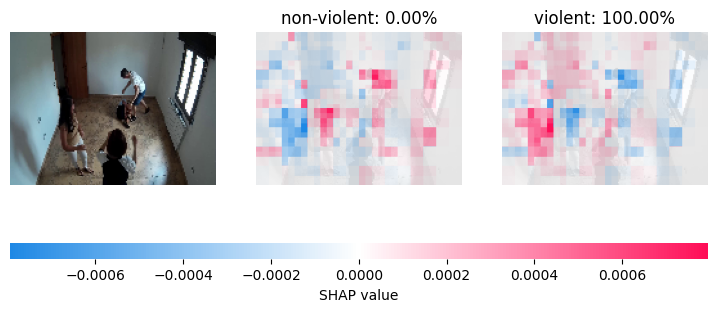

In [ ]:
#'/content/drive/MyDrive/AIRTLab/test/violent/v45f104.jpg'
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

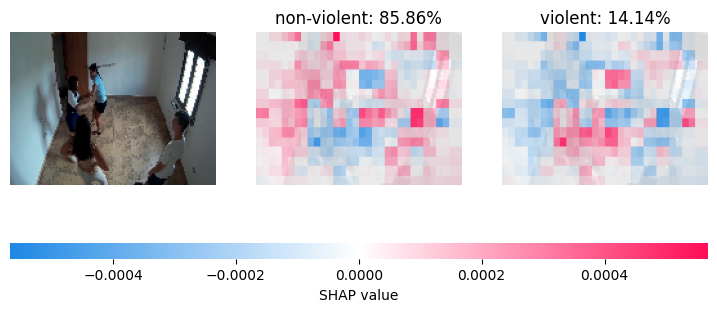

In [ ]:
#'/content/drive/MyDrive/AIRTLab/test/violent/v35f56.jpg'
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

#### exemplos non-violent

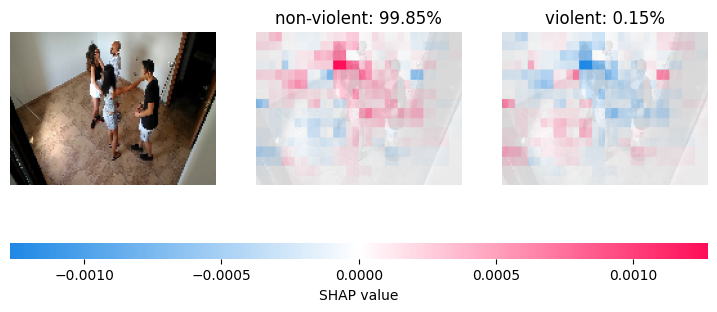

In [ ]:
#'/content/drive/MyDrive/AIRTLab/test/non-violent/v9f71.jpg'
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

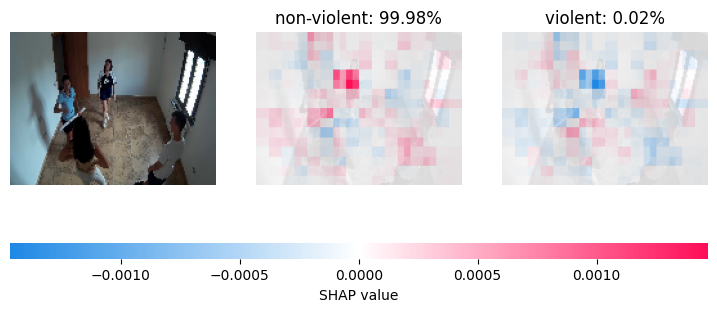

In [ ]:
#'/content/drive/MyDrive/AIRTLab/test/non-violent/v19f13.jpg'
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

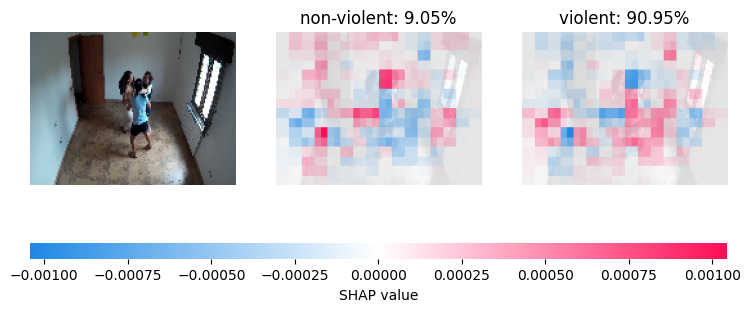

In [ ]:
#'/content/drive/MyDrive/AIRTLab/test/non-violent/v35f169.jpg'
shap.image_plot(shap_values_, np.expand_dims(imagem, axis=0), labels=labels_predictions)

# Grad-CAM

In [ ]:
def resize(img):
  return cv2.resize(img, (160,120))

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

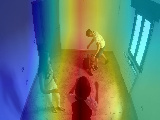

In [ ]:
#IMAGE_PATH = './cat.jpg'
LAYER_NAME = 'mixed10'   # check with model.summary() to confirm last conv layer
CLASS_INDEX = 1

#img = tf.keras.preprocessing.image.load_img(IMAGE_PATH, target_size=(224, 224))
#img = tf.keras.preprocessing.image.img_to_array(img)
base_image = cv2.imread('/content/drive/MyDrive/AIRTLab/test/violent/v45f104.jpg')
base_image = cv2.resize(base_image, (160, 120))
img = preprocess_input(base_image)

#model = tf.keras.applications.vgg16.VGG16(weights='imagenet', include_top=True)

grad_model = tf.keras.models.Model([model_inception.inputs], [model_inception.get_layer(LAYER_NAME).output, model_inception.output])

with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(np.array([img]))
    loss = predictions[:, CLASS_INDEX]

output = conv_outputs[0]
grads = tape.gradient(loss, conv_outputs)[0]

gate_f = tf.cast(output > 0, 'float32')
gate_r = tf.cast(grads > 0, 'float32')
guided_grads = tf.cast(output > 0, 'float32') * tf.cast(grads > 0, 'float32') * grads

weights = tf.reduce_mean(guided_grads, axis=(0, 1))

cam = np.ones(output.shape[0: 2], dtype = np.float32)

for i, w in enumerate(weights):
    cam += w * output[:, :, i]

cam = cv2.resize(cam.numpy(), (224, 224))
cam = np.maximum(cam, 0)
heatmap = (cam - cam.min()) / (cam.max() - cam.min())

cam = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)

output_image = cv2.addWeighted(base_image, 1 - 0.5,resize(cam), 0.5, 0)

#cv2.imwrite('gradcam_89.png', output_image)
cv2_imshow(output_image)

# LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=1e35a8e449a17574b50d0fe033c574116af4118465f8353cf322570ad509e731
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime


In [ ]:
import random
import pandas as pd
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

In [ ]:
'''
/content/drive/MyDrive/AIRTLab/test/violent/v35f56.jpg

/content/drive/MyDrive/AIRTLab/test/non-violent/v9f71.jpg
/content/drive/MyDrive/AIRTLab/test/non-violent/v19f13.jpg
/content/drive/MyDrive/AIRTLab/test/non-violent/v35f169.jpg
'''

In [ ]:
base_image = cv2.imread('/content/drive/MyDrive/AIRTLab/test/non-violent/v35f169.jpg')
base_image = cv2.cvtColor(base_image, cv2.COLOR_BGR2RGB)
base_image = cv2.resize(base_image, (160, 120))
#base_image = tf.cast(base_image, tf.float32)
#base_image = tf.expand_dims(base_image, 0)
#base_image = preprocess_input(base_image)
#img = preprocess_input(base_image)

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 362ms/step


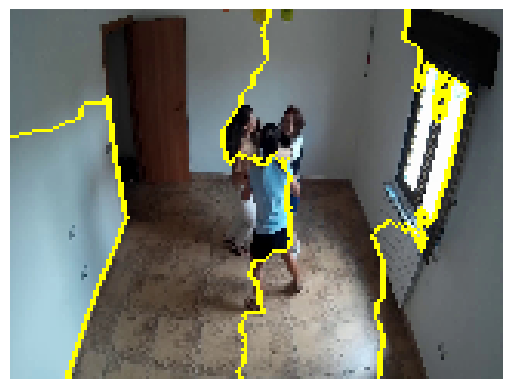

In [ ]:
explainer = lime_image.LimeImageExplainer(random_state=42)
explanation = explainer.explain_instance(base_image, model_inception.predict,top_labels=2)

image, mask = explanation.get_image_and_mask(0)
plt.imshow(mark_boundaries(image,mask))
plt.axis('off')
plt.show()